### 1. Loading Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2. Loading Data

In [21]:
df = pd.read_csv("netflix_dataset.csv")
print(df.shape)

(7787, 12)


In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [23]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### 2.1 Columns

In [24]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [25]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [27]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### 2.2 Understanding Data

### 2.2.1 Checking for NULL values

In [28]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### 2.2.2 Handling missing values

* We found out that director, cast, country, date_added and rating contain null values.

* For 'cast' and 'director' columns, replacing  NA values with 'No Data'.

In [29]:
df.director.fillna("No Data",inplace=True)
df.cast.fillna("No Data",inplace=True)

* Replacing  'country', 'date_added' and 'rating' with the mode of the column.

In [30]:
df.country.fillna(df.country.mode()[0],inplace=True)
df.date_added.fillna(df.date_added.mode()[0],inplace=True)
df.rating.fillna(df.rating.mode()[0],inplace=True)

In [31]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### 3.Final Analysis

 * Q1. Find and print the overall percentage of TV shows and Movies.

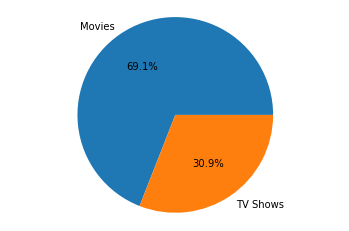

(69.1, 30.9)


In [32]:
Type = df.type
count_tv_shows = Type[Type == "TV Show"].count()
count_movies = Type[Type == "Movie"].count()
total = count_movies + count_tv_shows
percentage_movies = (count_movies / total) * 100
percentage_tv_shows = (count_tv_shows / total) * 100

labels = ['Movies', 'TV Shows']
sizes = [percentage_movies, percentage_tv_shows]
plt.pie(sizes, labels=labels, autopct='%.1f%%')
plt.axis('equal')
plt.show()

output = (round(percentage_movies, 1), round(percentage_tv_shows, 1))
print(output)

* Q2. show the top 10 countries with the most content.

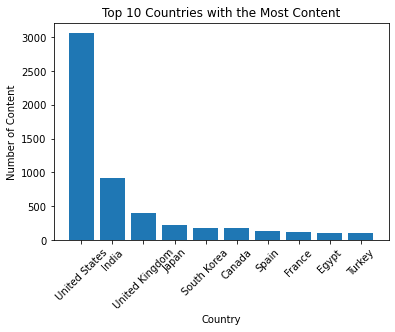

('United States', 3062)


In [33]:

country_counts = df.country.value_counts().head(10)
top_country = country_counts.index[0]
total_content = country_counts.iloc[0]

plt.bar(country_counts.index, country_counts.values)
plt.xlabel('Country')
plt.ylabel('Number of Content')
plt.title('Top 10 Countries with the Most Content')
plt.xticks(rotation=45)
plt.show()

output = (top_country, total_content)
print(output)


* Q3. create a bar chart for all the content added over the years.
And the print the year having the most number of content added.

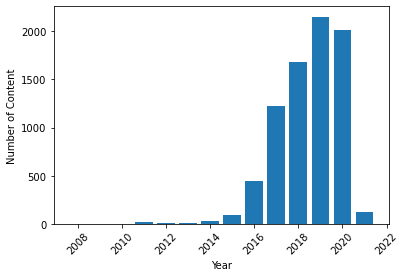

2019


In [34]:
x = pd.to_datetime(df["date_added"]).dt.year
df['year'] = x
content_per_year = df["year"].value_counts().sort_index()

plt.bar(content_per_year.index, content_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Content')
plt.xticks(rotation=45)
plt.show()

year_with_most_content = content_per_year.idxmax()
print(int(year_with_most_content))

* Q4. Find the most popular type of content in India

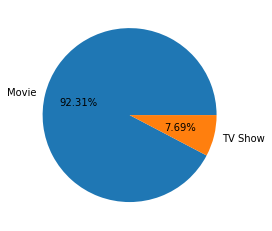

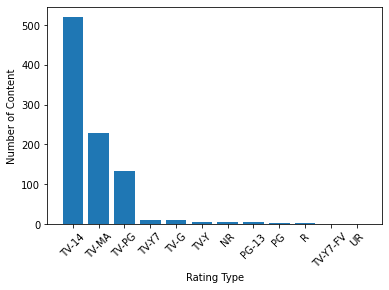

('Movie', 'TV-14')


In [35]:
india_data = df[df['country'] == 'India']
content_type_counts = india_data['type'].value_counts()

plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%.2f%%')
plt.show()

most_popular_content_type = content_type_counts.idxmax()
rating_counts = india_data['rating'].value_counts()

plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating Type')
plt.ylabel('Number of Content')
plt.xticks(rotation=45)
plt.show()

most_popular_rating_type = rating_counts.idxmax()

print((most_popular_content_type, most_popular_rating_type))

* Q5. Print the title of the longest movie duration and in which year it was released.

In [36]:
movies = df[df['type'] == 'Movie']
li = df["duration"].apply(lambda x: int(x.split(" ")[0])) 
df['time'] = li
movie = df.loc[df["time"].idxmax()]['title']
year = df.loc[df["time"].idxmax()]['date_added'][13:]
print(f"('{movie}' , {year})")

('Black Mirror: Bandersnatch' , 2018)
